#ZAKIA SYAHRINI
#IF-43-10
#1301194108

Setiap mahasiswa harus mengerjakan dua task (clustering dan classification) terhadap
dataset pada link gdrive: https://drive.google.com/drive/folders/14QPe3o6LeSjfYjkGhCZJM4pn-I55YsJ?usp=sharing. Tugas clustering (unsupervised Learning) adalah
mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa
memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru
atau tidak.

In [1]:
#MASUKKAN LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist



In [2]:
#DOWNLOAD DATA KENDARAAN_TRAIN
!gdown --id 1VAFV-soyTtaUx8k1sWR1kkCtuDA_yX3V

Downloading...
From: https://drive.google.com/uc?id=1VAFV-soyTtaUx8k1sWR1kkCtuDA_yX3V
To: /content/kendaraan_train.xlsx
100% 14.3M/14.3M [00:00<00:00, 123MB/s]


In [3]:
#BACA DATA KENDARAAN_TRAIN
data1 = pd.read_excel("kendaraan_train.xlsx",  usecols = ['Jenis_Kelamin', 'Umur', 'Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Lama_Berlangganan','Tertarik'])
data1

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0,0
1,Pria,48.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [4]:
#DOWNLOAD KENDARAAN_TEST
!gdown --id 1-tLY7LwlMwG7Kxk3u58J9gDNhSmfCIpa

Downloading...
From: https://drive.google.com/uc?id=1-tLY7LwlMwG7Kxk3u58J9gDNhSmfCIpa
To: /content/kendaraan_test.xlsx
100% 2.13M/2.13M [00:00<00:00, 66.7MB/s]


In [5]:
#BACA DATA KENDARAAN_TEST
data2 = pd.read_excel("kendaraan_test.xlsx")
data2.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0


In [6]:
#INFO DATA KENDARAAN_TRAIN
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   Kode_Daerah        271525 non-null  float64
 3   Sudah_Asuransi     271602 non-null  float64
 4   Umur_Kendaraan     271556 non-null  object 
 5   Kendaraan_Rusak    271643 non-null  object 
 6   Premi              271262 non-null  float64
 7   Kanal_Penjualan    271532 non-null  float64
 8   Lama_Berlangganan  271839 non-null  float64
 9   Tertarik           285831 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 21.8+ MB


In [7]:
#INFO DATA KENDARAAN_TEST
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [8]:
#DESCRIBE SEMUA DATA1
data1.describe()

,Umur,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
#CEK JUMLAH NULL DALAM TIAP KOLOM
check_null = data1.isnull().sum()
print(check_null)

Jenis_Kelamin        14440
Umur                 14214
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [10]:
#MENAMPILKAN JUMLAH DATA YANG DUPLIKAT
dupl = data1.duplicated()
print('Number of duplicate rows = %d' % (dupl.sum()))

Number of duplicate rows = 191


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


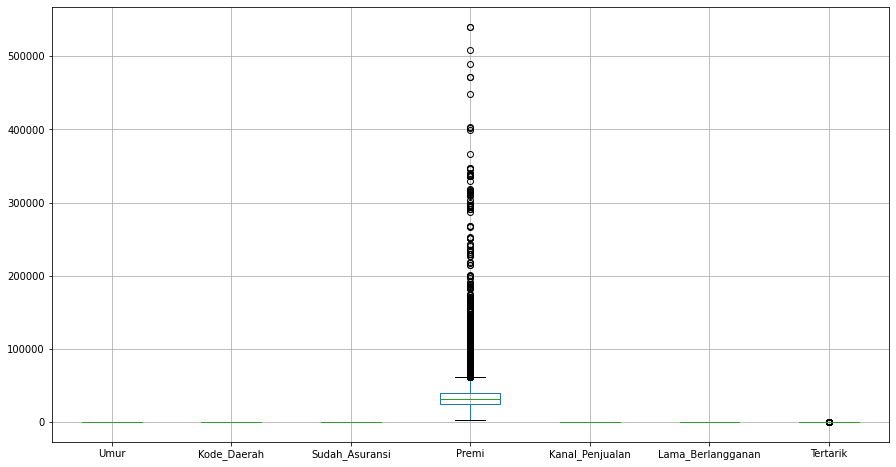

In [11]:
#CEK OUTLIER
data1.boxplot(figsize=[15,8])

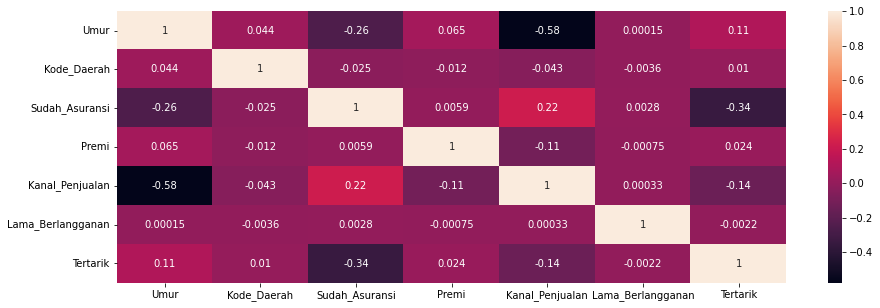

In [12]:
#KORELASI
korelasi = data1.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(korelasi, annot = True )

In [13]:
#MELIHAT UKURAN DATA1
data1.shape

(285831, 10)

DATA CLEAN(PEMBERSIHAN DATA)

In [14]:
#SPLIT DATA
data1_x = data1.iloc[:,:9]
data1_y = data1['Tertarik']

In [15]:
print('Data Shape x : ', data1_x.shape)

Data Shape x :  (285831, 9)


In [16]:
print('Data Shape y : ', data1_y.shape)

Data Shape y :  (285831,)


In [17]:
data1_y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Tertarik, dtype: int64

In [18]:
data1_x.head(5)

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0
1,Pria,48.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [19]:
#DROP NULL DARI DATA KENDARAAN TRAIN 
data1_x.dropna(inplace = True, axis =0)
check_null = data1_x.isnull().sum() 
print(check_null)

Jenis_Kelamin        0
Umur                 0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64


In [20]:
data1_x.shape

(180183, 9)

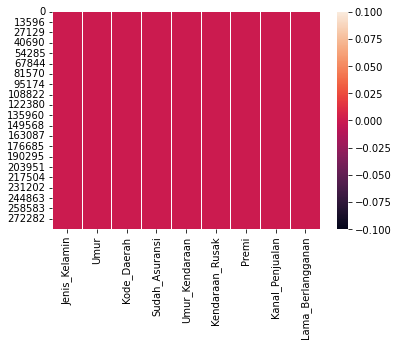

In [21]:
#HEATMAP CEK NILAI NULL SETIAP KOLOM
heatmap = sns.heatmap(data1_x.isnull())

In [22]:
#DROP DATA DULIKAT
data1_x = data1_x.drop_duplicates()
data1_x.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0
1,Pria,48.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
3,Wanita,58.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
5,Pria,21.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0
7,Pria,23.0,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0


In [23]:
#MENAMPILKAN JUMLAH DATA YANG DUPLIKAT
dupl = data1_x.duplicated()
print('Number of duplicate rows = %d' % (dupl.sum()))

Number of duplicate rows = 0


In [24]:
data1_x.shape

(180114, 9)

In [25]:
data1_x.to_excel(r'kendaraan_train.xlsx', index =  False)

In [26]:
#MEMBUAT INDEX BARU
#karena id sudah teracak

#data1_x = data1_x.drop(['id'], axis = 1)
#data1_x = data1_x.reset_index(drop=True)

In [27]:
data1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180114 entries, 0 to 285830
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      180114 non-null  object 
 1   Umur               180114 non-null  float64
 2   Kode_Daerah        180114 non-null  float64
 3   Sudah_Asuransi     180114 non-null  float64
 4   Umur_Kendaraan     180114 non-null  object 
 5   Kendaraan_Rusak    180114 non-null  object 
 6   Premi              180114 non-null  float64
 7   Kanal_Penjualan    180114 non-null  float64
 8   Lama_Berlangganan  180114 non-null  float64
dtypes: float64(6), object(3)
memory usage: 13.7+ MB


In [28]:
print('Nilai unique dari tipe data objects yaitu :')

#MELIHAT NILAI UNIK JENIS KELAMIN
print('----Unik Jenis Kelamin----')
print(data1_x['Jenis_Kelamin'].unique())

#MELIHAT NILAI UNIK UMUR KENDARAAN
print('----Unik Umur Kendaraan----')
print(data1_x['Umur_Kendaraan'].unique())

#MELIHAT NILAI UNIK KENDARAAN RUSAK
print('----Unik Kendaraan Rusak----')
print(data1_x['Kendaraan_Rusak'].unique())

Nilai unique dari tipe data objects yaitu :
----Unik Jenis Kelamin----
['Wanita' 'Pria']
----Unik Umur Kendaraan----
['< 1 Tahun' '> 2 Tahun' '1-2 Tahun']
----Unik Kendaraan Rusak----
['< 1 Tahun' 'Pernah' 'Tidak']


In [29]:
#LABEL MAPPING OBJECT MENJADI NUMERICAL
mp = {
    'Wanita': 0,'Pria': 1,'< 1 Tahun': 0,'> 2 Tahun': 2,'1-2 Tahun': 1,'Pernah' : 1,'Tidak': 0,
    
} 
#KATEGORI MAPPING
data1_x = data1_x.replace({'Jenis_Kelamin':mp,'Umur_Kendaraan':mp,'Kendaraan_Rusak':mp})
data1_x.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,30.0,33.0,1.0,0,0,28029.0,152.0,97.0
1,1,48.0,39.0,0.0,2,1,25800.0,29.0,158.0
3,0,58.0,48.0,0.0,1,0,2630.0,124.0,63.0
5,1,21.0,35.0,1.0,0,0,22735.0,152.0,171.0
7,1,23.0,28.0,1.0,0,0,26869.0,152.0,222.0


In [30]:
data1_x.to_excel(r'kendaraaan_notchar.xlsx', index = False)

In [31]:
#HILANGKAN OUTLIERS USING IQR
Q1 = data1_x.quantile(0.25)
Q3 = data1_x.quantile(0.75)
IQR = Q3 - Q1

data1_x = data1_x.loc[~((data1_x < (Q1 - 1.5 * IQR)).any(axis=1)|(data1_x > (Q3 + 1.5 * IQR)).any(axis=1))].dropna()
data1_x.reset_index(drop=True, inplace=True)


In [32]:
data1_x.shape

(175205, 9)

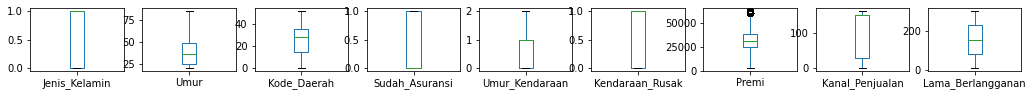

In [33]:
data1_x.plot(kind = 'box',figsize = [60,55], subplots = True, layout = (40,30), sharex = False, sharey = False)
plt.show()

In [34]:
data1_x.to_excel(r'kendaraan_train_outlier.xlsx', index = False)

In [35]:
#NORMALISASI MENGGUNAKAN MINMAXSCALER
scaler = MinMaxScaler()
data1_x = pd.DataFrame(scaler.fit_transform(data1_x), columns=data1_x.columns)
data1_x


,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,0.153846,0.634615,1.0,0.0,0.0,0.429371,0.932099,0.301038
1,1.0,0.430769,0.750000,0.0,1.0,1.0,0.391689,0.172840,0.512111
2,0.0,0.584615,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391
3,1.0,0.015385,0.673077,1.0,0.0,0.0,0.339876,0.932099,0.557093
4,1.0,0.046154,0.538462,1.0,0.0,0.0,0.409761,0.932099,0.733564
...,...,...,...,...,...,...,...,...,...
175200,0.0,0.046154,0.076923,1.0,0.0,0.0,0.394868,0.932099,0.716263
175201,0.0,0.015385,0.884615,1.0,0.0,0.0,0.710958,0.932099,0.138408
175202,0.0,0.046154,0.961538,1.0,0.0,0.0,0.796582,0.932099,0.747405
175203,1.0,0.738462,0.134615,1.0,0.5,0.0,0.471194,0.759259,0.899654


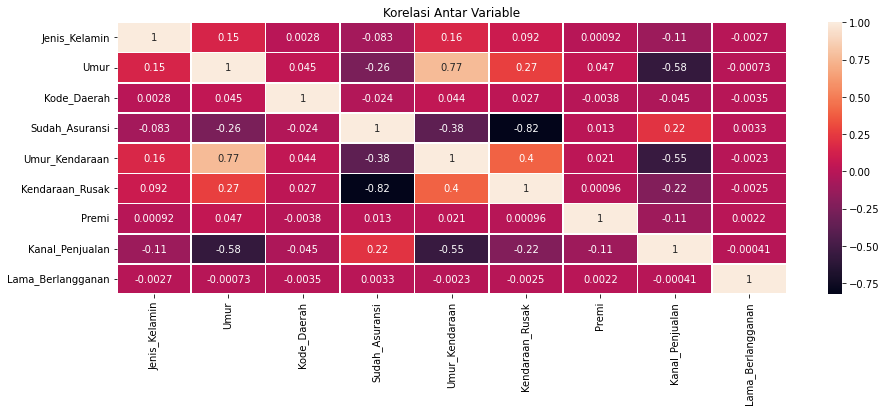

In [36]:
#KORELASI ANTAR VARIABLE
plt.figure(figsize=(15,5))
sns.heatmap(data1_x.corr(), annot = True, linewidths=.5)
plt.title("Korelasi Antar Variable" , y = 1.1)
plt.show()

In [37]:
#data1_x = data1_x.drop(['SIM'], axis = 1 )

In [38]:
data1_x.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,0.153846,0.634615,1.0,0.0,0.0,0.429371,0.932099,0.301038
1,1.0,0.430769,0.750000,0.0,1.0,1.0,0.391689,0.172840,0.512111
2,0.0,0.584615,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391
3,1.0,0.015385,0.673077,1.0,0.0,0.0,0.339876,0.932099,0.557093
4,1.0,0.046154,0.538462,1.0,0.0,0.0,0.409761,0.932099,0.733564


CLUSTERING K-MEANS

In [39]:
#COMBINE KOLOM DAN BUAT 1 DAN 2
pca       = PCA(n_components = 2)
pca_data  = pca.fit_transform(data1_x)
pca_data1 = pd.DataFrame(data = pca_data, columns = ['PCA 1', 'PCA 2'])
pca_data1.shape 

(175205, 2)

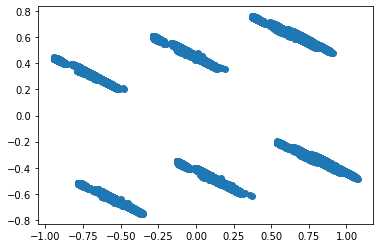

In [40]:
plt.scatter(pca_data[:,0],pca_data[:,1])

In [41]:
pca_data

array([[-0.90262885,  0.42007367],
       [ 0.97991195, -0.42421764],
       [-0.03722252,  0.48512783],
       ...,
       [-0.91314756,  0.42632599],
       [-0.52191977, -0.65435462],
       [ 0.86306907, -0.37933625]])

In [42]:
pca_data1.head()

,PCA 1,PCA 2
0,-0.902629,0.420074
1,0.979912,-0.424218
2,-0.037223,0.485128
3,-0.762050,-0.526646
4,-0.759569,-0.529497


In [43]:
#INISIALISASI VARIABLE
# JUMLAH CENTROID 
K = 2 
 # JUMLAH ITERASI ATAU PERULANGAN // MASUKKAN JUMLAH ITERASI            
iterations = 100   

nilaipca = pca_data1.values.shape
print(nilaipca)

(175205, 2)


In [44]:
#BUAT CENTROID
centroids = np.array([]).reshape(nilaipca[1],0) 
centroids

array([], shape=(2, 0), dtype=float64)

In [45]:
# RANDOM CENTROID SECARA ACAK
for i in range(K):
    rand = np.random.randint (0 , nilaipca [0]-1)
    centroids = np.c_ [centroids, pca_data1.values[rand]]


# MEMBUAT MATRIX UNTUK MENGHITUNG JARAK EUCLIDIAN
for i in range(iterations):

    EuclidianDistance=np.array([]).reshape(nilaipca[0],0)

    for i in range(K):
        tempDist = np.sum((pca_data1-centroids[:,i]) ** 2, axis = 1)
        EuclidianDistance = np.c_[EuclidianDistance,tempDist]
    hasil = np.argmin(EuclidianDistance,axis=1)+1

    temp={}
    for i in range(K):
        temp[i+1]=np.array([]).reshape(2,0)

    for i in range(nilaipca[0]):
        temp[hasil[i]]=np.c_[temp[hasil[i]],pca_data1.values[i]]

    for i in range(K):
        temp[i+1]=temp[i+1].T

    for i in range(K):
         centroids[:,i]=np.mean(temp[i+1],axis=0)
    output = temp

    colors = [
     'red',
     'yellow'
    ]
    labels=[
      'tertarik','tidak tertarik']
    colors

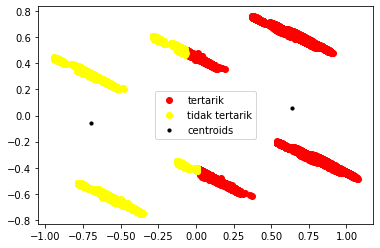

In [46]:
# PLOTTING DAN LABELING
for k in range(K):

    plt.scatter(output[k+1][:,0],output[k+1][:,1],c=colors[k],label=labels[k])
    
plt.scatter(centroids[0,:],
            centroids[1,:],
            s=10,
            c='black',
            label='centroids')

plt.legend()
plt.show()

#EVALUASI

In [47]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# BUILD MODEL
	kmeanModel = KMeans(n_clusters=k).fit(pca_data1)
	kmeanModel.fit(pca_data1)

	distortions.append(sum(np.min(cdist(pca_data1, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / pca_data1.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(pca_data1, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / pca_data1.shape[0]
	mapping2[k] = kmeanModel.inertia_

In [48]:
for key, val in mapping1.items():
	print(f'{key} : {val}')

1 : 0.8486191615823718
2 : 0.5268286639933478
3 : 0.3520606334125211
4 : 0.17805177030685715
5 : 0.14891003651624132
6 : 0.123427441607417
7 : 0.10248308412204019
8 : 0.08917973981177027
9 : 0.0706514988170395


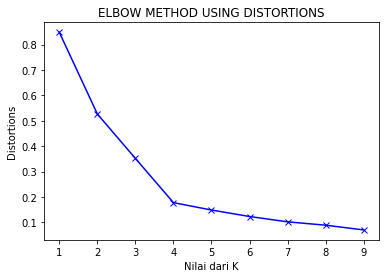

In [49]:
plt.plot(K, distortions, 'bx-')
plt.title('ELBOW METHOD USING DISTORTIONS')
plt.xlabel('Nilai dari K')
plt.ylabel('Distortions')
plt.show()